In [13]:
import math
import numpy as np 
import matplotlib.pyplot as plt
import random
%matplotlib inline

In [3]:
def f(x):
    return 3*x**2 - 4*x + 5

In [4]:
f(3.0)

20.0

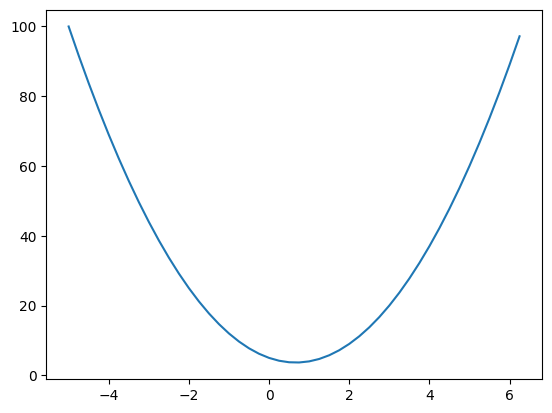

In [5]:
xs = np.arange(-5, 6.5, 0.25)
ys = f(xs)
plt.plot(xs, ys)

In [7]:
class Value:

    def __init__(self, data, _children = (), _operation = "", label = ""):
        self.data = data
        self._prev = set(_children)
        self._operation = _operation
        self.label = label
        self.grad = 0.0
        self._backward = lambda : None

    def __repr__(self):
        return f"Value(data = {self.data})"

    def __pow__(self, other):
        assert isinstance(other, (int, float)), "only supporting int/float powers for now"
        power = self.data ** other
        children = (self, )
        operation = " power "
        result = Value(data = power, _children = children, _operation = operation)
        def _backward():
            self.grad += other * (self.data ** (other - 1)) * result.grad

        self._backward = _backward
        return result

    def exp(self):
        x = self.data
        exponential = math.exp(x)
        children = (self, )
        operation = " exp "
        result = Value(data = exponential, _children = children, _operation = operation)
        def _backward():
            self.grad += result.data * result.grad
        self._backward = _backward
        return result
        

    def __add__(self, other):
        other = other if isinstance(other, Value) else Value(other)
        addition = self.data + other.data
        children = (self, other)
        operation = " add "
        result = Value(data = addition, _children = children, _operation = operation)
        def _backward():
            self.grad += 1.0 * result.grad
            other.grad += 1.0 * result.grad
        self._backward = _backward
        return result

    def __mul__(self, other):
        other = other if isinstance(other, Value) else Value(other)
        multiplication = self.data * other.data
        children = (self, other)
        operation = " mul "
        result = Value(data = multiplication, _children = children, _operation = operation)
        def _backward():
            self.grad += other.data * result.grad
            other.grad += self.data * result.grad
        self._backward = _backward
        return result

    def tanh(self):
        x = self.data
        operation = " tanh "
        children = (self, )
        tanh = (math.exp(2 * x) - 1) / (math.exp(2 * x) + 1)
        result = Value(data = tanh, _children = children, _operation = operation)
        def _backward():
            self.grad += (1.0 - tanh * tanh) * result.grad
        self._backward = _backward
        return result

    def backward(self):
        topo = []
        visited = set()
        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    build_topo(child)
                topo.append(v)
        build_topo(self)
        self.grad = 1.0
        for node in reversed(topo):
            node._backward()

    def __neg__(self):
        return -1 * self

    def __sub__(self, other):
        return self + (-other)

    def __truediv__(self, other):
        return self * other ** -1.0

    def __rmul__(self, other):
        return self * other

    def __radd__(self, other):
        return self + other

    def __rsub__(self, other):
        return other + (-self)

    def __rtruediv__(self, other):
        return other * self**-1
        

In [8]:
l = Value(6.0)
g = Value(3.0)

In [9]:
12 / l

Value(data = 2.0)

In [8]:
from graphviz import Digraph
def trace(root):
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges
def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'})
  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    dot.node(name=uid, label="{%s | data %.4f | grad %.4f }" % (n.label, n.data, n.grad), shape="record")
    if n._operation:
      dot.node(name = uid + n._operation, label = n._operation)
      dot.edge(uid + n._operation, uid)
  for n1, n2 in edges:
    dot.edge(str(id(n1)), str(id(n2)) + n2._operation)

  return dot

In [11]:
a = Value(data = 2.0, label = "a")
b = Value(data = -3.0, label = "b")
c = Value(data = 10.0, label = "c")
e = a * b; e.label = "e"
d = e + c; d.label = "d"
f = Value(-2.0, label = "f")
L = d * f; L.label = "L"
L

Value(data = -8.0)

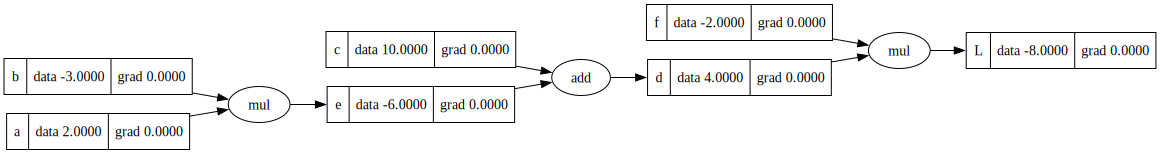

In [12]:
draw_dot(L)

Lets make simple neuron

In [13]:
x1 = Value(data = 2.0, label = "x1")
w1 = Value(data = -3.0, label = "w1")
x2 = Value(data = 0.0, label = "x2")
w2 = Value(data = 1.0, label = "w2")
b = Value(data = 6.8813735870195432, label = "bias")

x1w1 = x1 * w1; x1w1.label = "x1w1"
x2w2 = x2 * w2; x2w2.label = "x2w2"

x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = "x1w1x2w2"
n = x1w1x2w2 + b; n.label = "n"
o = n.tanh(); o.label = "o"

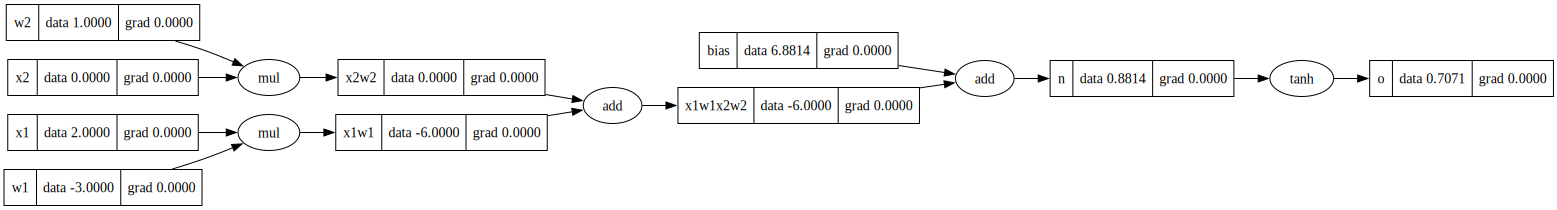

In [14]:
draw_dot(o)

In [15]:
o.grad = 1.0

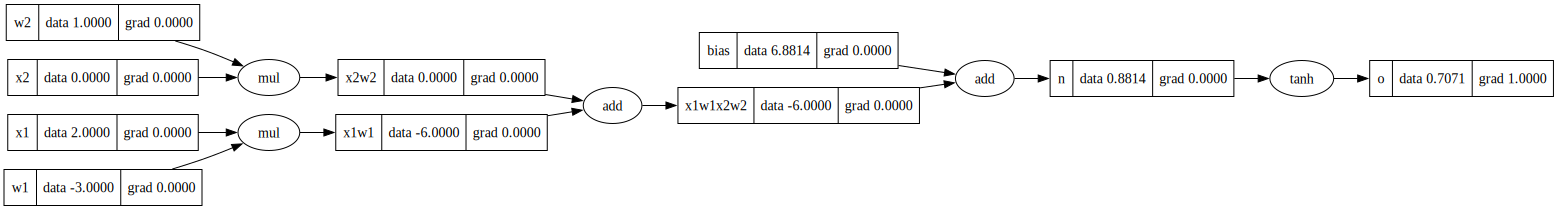

In [16]:
draw_dot(o)

In [17]:
o._backward()

In [18]:
n._backward()

In [19]:
x1w1x2w2._backward()

In [20]:
x1w1._backward()

In [21]:
x2w2._backward()

In [22]:
x1._backward()

In [23]:
w1._backward()

In [24]:
x2._backward()

In [25]:
w2._backward()

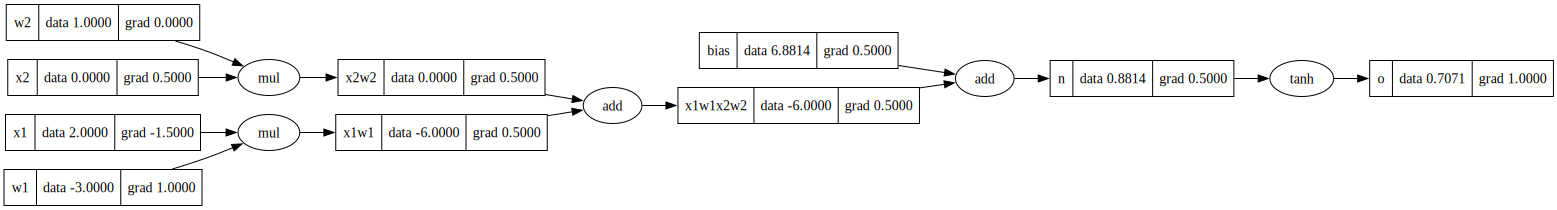

In [26]:
draw_dot(o)

In [27]:
o.backward()

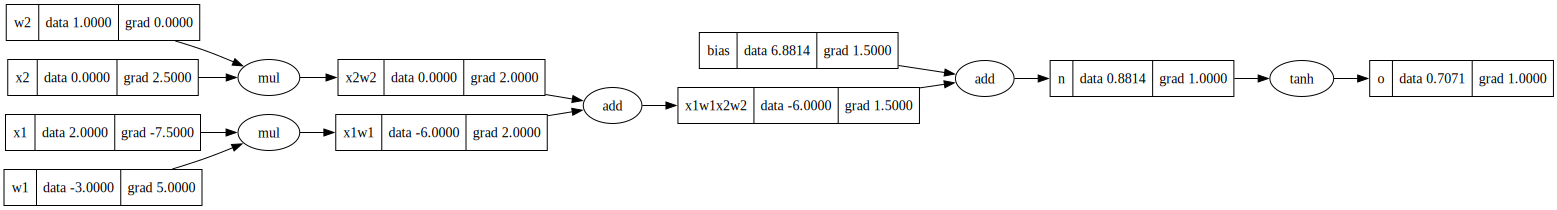

In [28]:
draw_dot(o)

In [9]:
x1 = Value(data = 2.0, label = "x1")
w1 = Value(data = -3.0, label = "w1")
x2 = Value(data = 0.0, label = "x2")
w2 = Value(data = 1.0, label = "w2")
b = Value(data = 6.8813735870195432, label = "bias")

x1w1 = x1 * w1; x1w1.label = "x1w1"
x2w2 = x2 * w2; x2w2.label = "x2w2"

x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = "x1w1x2w2"
n = x1w1x2w2 + b; n.label = "n"
kkk = (2 * n).exp(); kkk.label = "kkk"

up = kkk - 1; up.label = "up"
down = kkk + 1; down.label = "down"

r = up / down; r.label = "result"

r.backward()

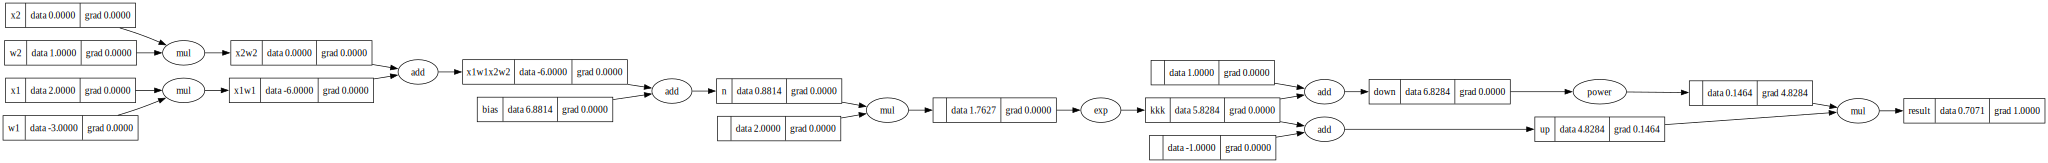

In [10]:
draw_dot(r)

In [14]:
class Neuron:
    
    def __init__(self, nin):
        self.w = [Value(random.uniform(-1,1)) for _ in range(nin)]
        self.b = Value(random.uniform(-1,1))
        
    def __call__(self, x):
        # w * x + b
        act = sum((wi*xi for wi, xi in zip(self.w, x)), self.b)
        out = act.tanh()
        return out
    
    def parameters(self):
        return self.w + [self.b]
    
class Layer:
    
    def __init__(self, nin, nout):
        self.neurons = [Neuron(nin) for _ in range(nout)]
        
    def __call__(self, x):
        outs = [n(x) for n in self.neurons]
        return outs[0] if len(outs) == 1 else outs
    
    def parameters(self):
        return [p for neuron in self.neurons for p in neuron.parameters()]

class MLP:
    
    def __init__(self, nin, nouts):
        sz = [nin] + nouts
        self.layers = [Layer(sz[i], sz[i+1]) for i in range(len(nouts))]
        
    def __call__(self, x):
        for layer in self.layers:
            x = layer(x)
        return x
    
    def parameters(self):
        return [p for layer in self.layers for p in layer.parameters()]

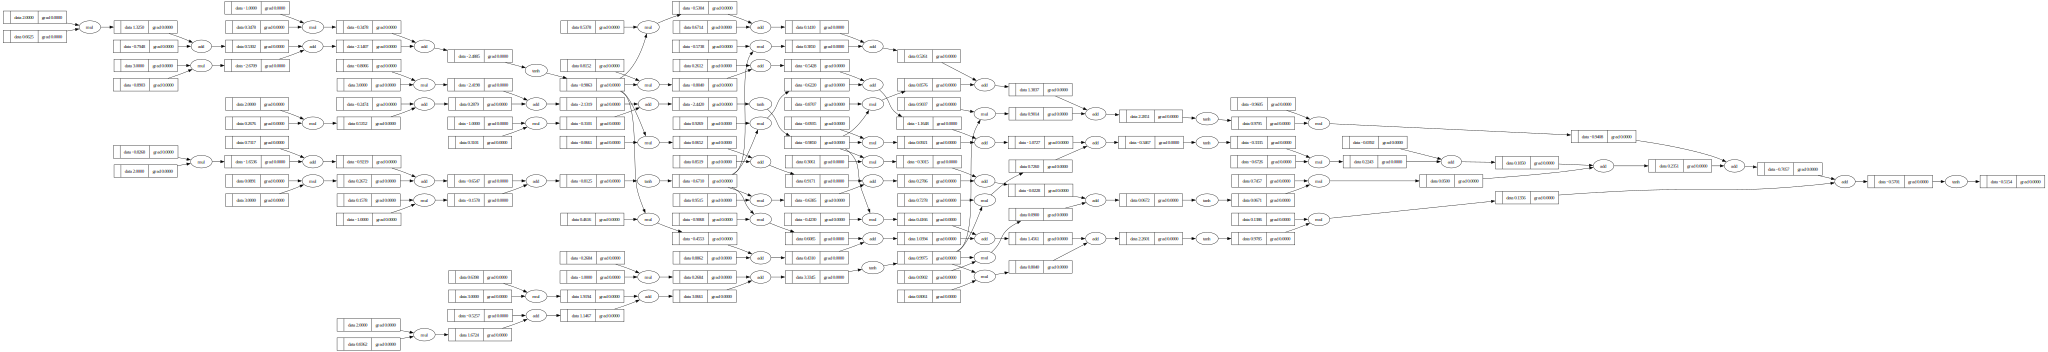

In [15]:
x = [2.0, 3.0, -1.0]
n = MLP(3, [4,4,1])
n(x)

draw_dot(n(x))